<a href="https://colab.research.google.com/github/zainabhameed24/Advance_tasks_of_Internship-Develoer-Hub-Corporation/blob/main/Internship_task_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Customer Segmentation Using Unsupervised Learning**

Objective:
Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.

Dataset:
Mall Customers Dataset

**Load Data set**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers.csv")
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**● Conduct Exploratory Data Analysis (EDA)**

**Basic dataset exploration**

In [ ]:
# number of rows and columns
print(df.shape)

# Dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.0

**Explanation:**

These commands give a quick overview of the dataset: the first few rows, column data types, summary statistics (mean, min, max, etc.), and whether any values are missing.
In short, they help you understand dataset structure and data quality before deeper analysis.

/tmp/ipython-input-4008210367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, palette="pastel")


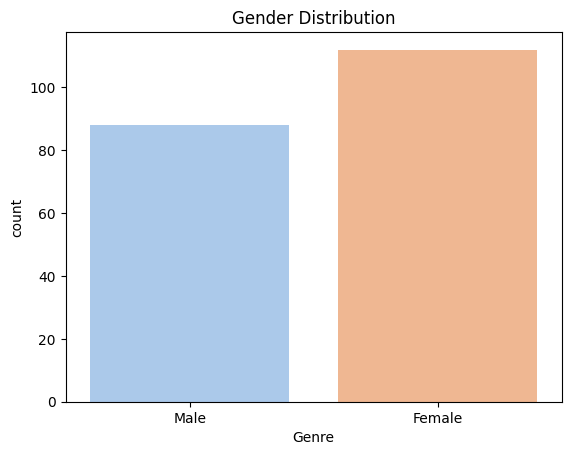

Genre
Female    112
Male       88
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Genre", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()
print(df["Genre"].value_counts())


**Explanation**

This code plots the gender distribution in the dataset using a countplot.
The value_counts() shows the exact number of males and females in the dataset.

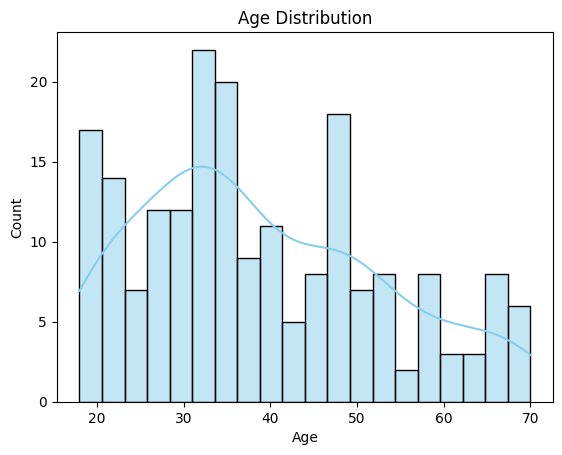

In [ ]:
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()


**Explanation**
This code draws a histogram of customer ages with 20 bins and a smooth KDE curve for trend visualization.
The output shows how ages are distributed, highlighting the most common age groups in the dataset.

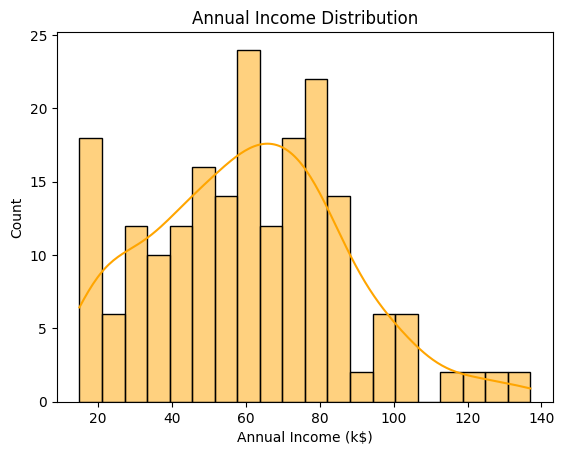

In [ ]:
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="orange")
plt.title("Annual Income Distribution")
plt.show()


**Explanation:**

This histogram shows the distribution of annual income of customers, mostly ranging between 40k–80k.
The KDE curve indicates the data is slightly right-skewed, with fewer high-income customers above 100k.

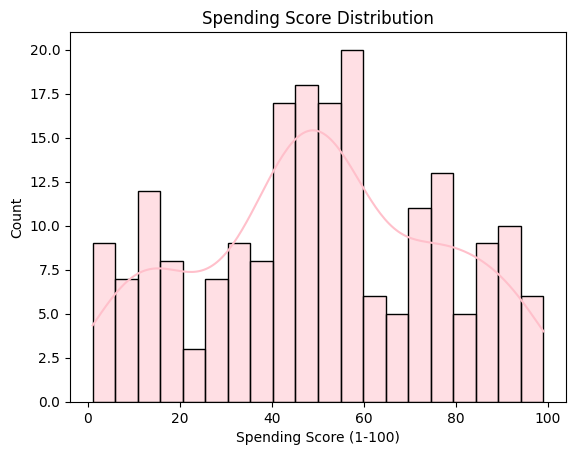

In [ ]:
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="pink")
plt.title("Spending Score Distribution")
plt.show()


**Explanation**

This histogram shows the distribution of spending scores among customers, spread fairly evenly across the 0–100 range.
It suggests no clear skew, meaning customers are mixed between low, medium, and high spenders.

/tmp/ipython-input-4286960058.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Age", data=df, palette="Set1")


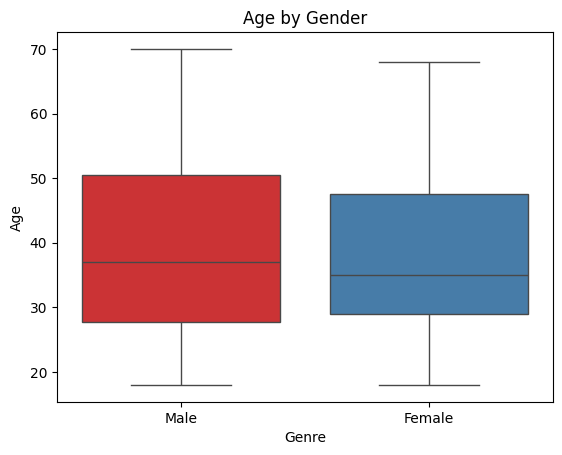

In [ ]:
sns.boxplot(x="Genre", y="Age", data=df, palette="Set1")
plt.title("Age by Gender")
plt.show()


**Explanation:**

This code creates a boxplot comparing the distribution of Age across Male and Female groups.
The box shows the middle 50% of ages, with the line inside representing the median age.
From the plot, males have a slightly higher median age than females, and both groups span roughly from 18 to around 70.
The spread (variability) of ages is wider for males, while females are slightly more concentrated.

/tmp/ipython-input-4263074591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set2")


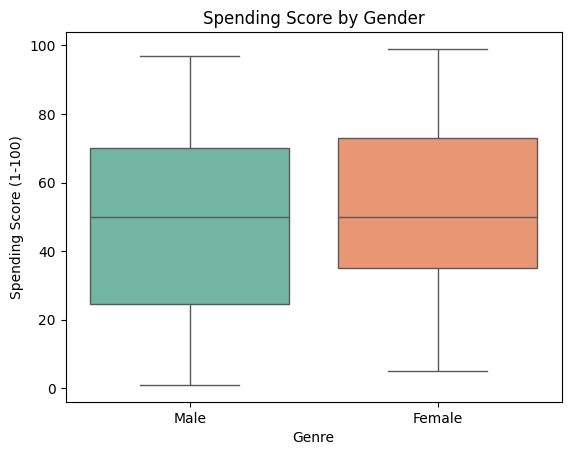

In [ ]:
sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set2")
plt.title("Spending Score by Gender")
plt.show()


**Explanation:**

This code makes a boxplot of the Spending Score (1–100) for males and females using Seaborn.
The boxes show the middle 50% of scores, and the line inside is the median spending score.
From the plot, both genders have similar medians around 50, but females show slightly higher spread toward higher scores.
The range of spending scores is wide for both groups, with values spanning from very low (~0) to very high (~100).

/tmp/ipython-input-878138312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set3")


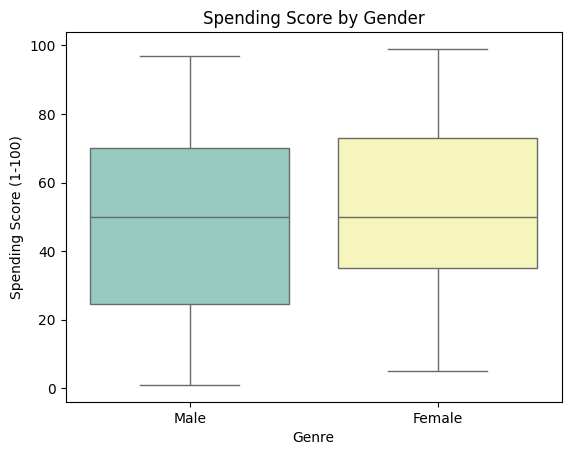

In [ ]:
sns.boxplot(x="Genre", y="Spending Score (1-100)", data=df, palette="Set3")
plt.title("Spending Score by Gender")
plt.show()


**Explanation:**

This code draws a boxplot of Spending Score (1–100) for males and females using the "Set3" color palette.
The median line inside each box shows the typical spending score (around 50 for both genders).
Males and females have similar ranges, but females show a slightly broader spread toward higher values.
Both groups span almost the full range (0–100), indicating large variation in spending behavior.

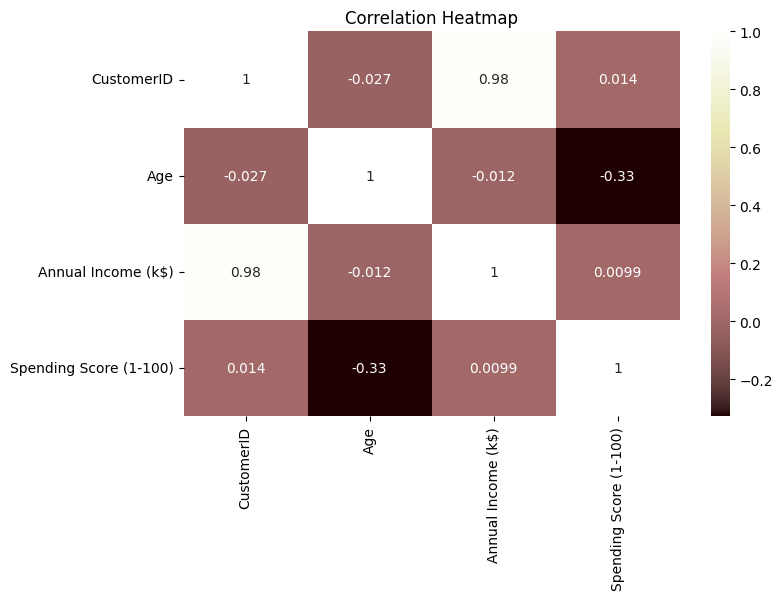

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="pink")
plt.title("Correlation Heatmap")
plt.show()


**Explanation:**

The code generates a correlation heatmap, visualizing relationships between numeric variables in a dataset. The heatmap displays correlation coefficients, ranging from -1 (dark) to 1 (light). Strong correlations appear as intense colors, while weak correlations appear faint. The image output shows specific correlation values between variables.

● Apply K-Means Clustering to segment customers

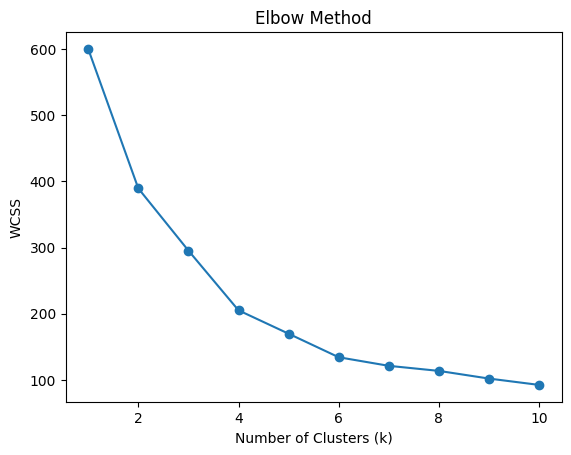

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          2  
3          2  
4          2

In [ ]:
# ------------------ IMPORTS ------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# ------------------ FEATURE SELECTION ------------------
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# ------------------ SCALING ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ ELBOW METHOD ------------------
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# ------------------ APPLY K-MEANS ------------------
kmeans = KMeans(n_clusters=3, random_state=42)  # Suppose k=3 from elbow
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df)


**Explanation:**

The code performs K-Means clustering on customer data, using the Elbow Method to determine optimal clusters. It scales features, calculates Within Cluster Sum of Squares (WCSS), and plots WCSS against cluster numbers. The output image shows the Elbow Method plot, helping identify the optimal cluster number. The chosen k (3) might not be optimal based on the plot.

**● Use PCA or t-SNE to visualize the clusters**

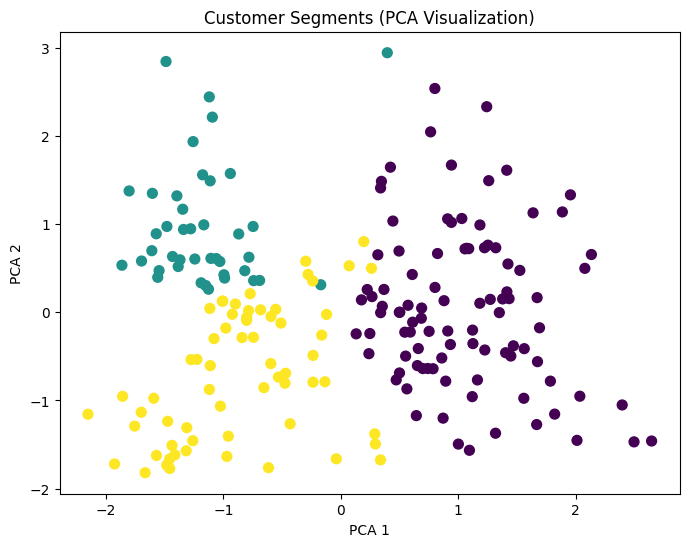

In [ ]:
from sklearn.decomposition import PCA

# ------------------ PCA for Visualization ------------------
pca = PCA(n_components=2)   # reduce data to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", s=50)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


**Explanation:**

The code applies PCA to reduce customer data dimensions to 2D for visualization. It then scatter plots the clusters, coloring points by their assigned labels. The output image shows a 2D representation of customer segments, with distinct clusters indicating potential market groups. The clusters are visually separated, suggesting effective segmentation.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


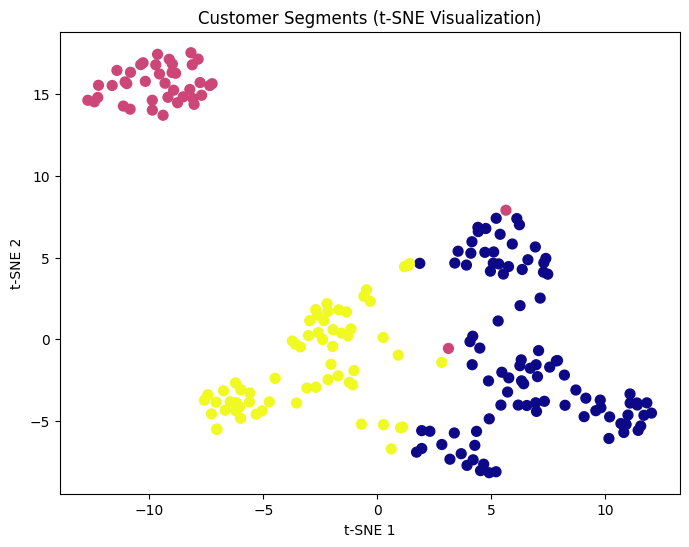

In [ ]:
from sklearn.manifold import TSNE

# ------------------ t-SNE for Visualization ------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df["Cluster"], cmap="plasma", s=50)
plt.title("Customer Segments (t-SNE Visualization)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


**Explanation:**

The code uses t-SNE to visualize high-dimensional customer data in 2D, preserving local structures. The output image shows customer segments with distinct clusters, colored by their assigned labels. The clusters indicate potential market groups, with some separation and structure visible. The visualization highlights complex patterns in the data.